In [68]:
#!pip install tensorflow==2.8.0

In [69]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.8.0'

In [70]:
from tensorflow.keras.models import load_model # função de carregamento de modelos já treinados
from tensorflow.keras.preprocessing.image import img_to_array # função de conversão de imagem para array

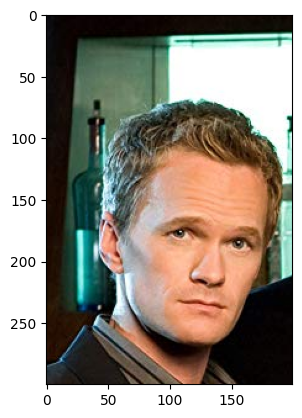

In [71]:
import matplotlib.pyplot as plt
img = cv2.imread('/kaggle/input/arquivos-card-20/Material/testes/teste05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converte de BGR (padrão do opencv) para RGB (padrão do matplotlib)
img = img[100:400, 0:200]
plt.imshow(img)

In [72]:
cascade_faces = '/kaggle/input/arquivos-card-20/Material/haarcascade_frontalface_default.xml'
face_detection = cv2.CascadeClassifier(cascade_faces) # cria o objeto do modelo a partir do xml de um modelo pré-treinado

In [73]:
model_path = '/kaggle/input/arquivos-card-20/Material/modelo_01_expressoes.h5'
classifier_emotion = load_model(model_path, compile = False) # cria o modelo tensorflow a partir do h5 salvo, a compilação não é feita pois o modelo salvo já foi compilado

In [74]:
emotions = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']

In [75]:
original = img.copy() # cria uma cópia da imagem original
# faz a detecção das faces na imagem com o modelo pré-treinado face_detection, dados os parâmetros da função detectMultiScale
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                       minNeighbors = 3, minSize = (20,20))

In [76]:
faces

array([[ 75, 137, 116, 116]], dtype=int32)

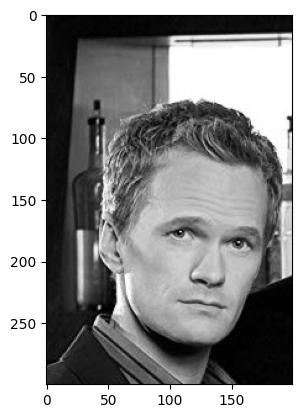

In [77]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

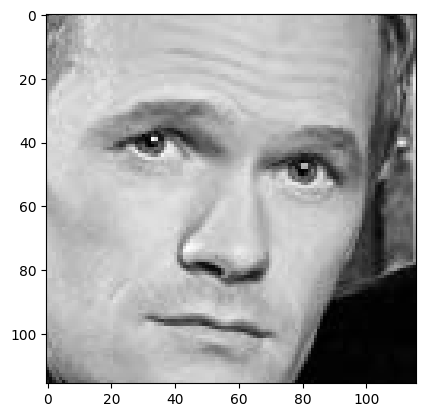

In [78]:
roi = gray[137:137+116, 75:75+116] # seleciona a região do rosto com base na seleção retornada pelo modelo face_detection
plt.imshow(roi, cmap='gray')

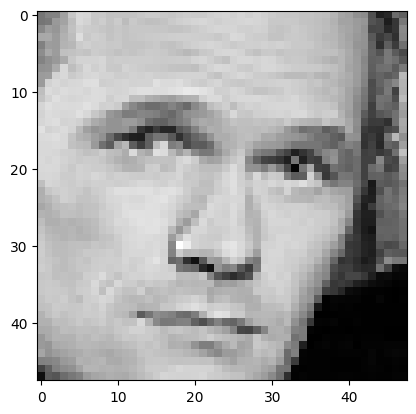

In [79]:
# reajustando a dimensionalidade da roi para a qual os modelos que serão usados foram treinados
roi = cv2.resize(roi, (48, 48))
plt.imshow(roi, cmap='gray')

In [80]:
# os modelos que serão usados utilizam floats normalizados entre 0 e 1
roi = roi.astype('float')/255.
roi

array([[0.42352941, 0.47058824, 0.47843137, ..., 0.14901961, 0.39215686,
        0.34509804],
       [0.42352941, 0.43921569, 0.55294118, ..., 0.10980392, 0.2       ,
        0.43529412],
       [0.49411765, 0.56862745, 0.54509804, ..., 0.14901961, 0.2       ,
        0.50196078],
       ...,
       [0.46666667, 0.47843137, 0.49411765, ..., 0.01176471, 0.01960784,
        0.01568627],
       [0.25098039, 0.35294118, 0.46666667, ..., 0.00784314, 0.01568627,
        0.01176471],
       [0.05490196, 0.33333333, 0.30980392, ..., 0.01176471, 0.01960784,
        0.01960784]])

In [81]:
roi = img_to_array(roi) # converte a imagem para um array dimensionada para tensorflow, com o canal de cor (unitário, neste caso)
roi.shape

(48, 48, 1)

In [82]:
# agora, é adicionada a dimensão de batch
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 1)

In [83]:
preds = classifier_emotion.predict(roi)[0] # a posição 0 se refere a primeira imagem, já que o array de roi tem uma dimensão de batch, ou seja, pode ter mais de uma imagem

In [84]:
preds

array([0.13556497, 0.00248272, 0.11859278, 0.05494566, 0.21497884,
       0.01830771, 0.4551273 ], dtype=float32)

In [85]:
emotion_prob = np.max(preds)
emotion_prob

0.4551273

In [86]:
max_index = preds.argmax() # retorna o índice do maior elemento
emotions[max_index]

'Neutro'

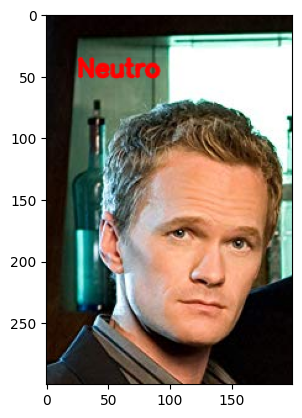

In [87]:
# adiciona o texto com label à face
cv2.putText(original, # imagem original a ser processada
            emotions[max_index], # label da emoção
            (25, 50), # onde por o texto na imagem
            cv2.FONT_HERSHEY_SIMPLEX, # tipo da fonte
            0.65, # tamanho da fonte
            (255, 0, 0), # cor da fonte
            2, # espessura da linha
            cv2.LINE_AA # tipo da linha
           )
plt.imshow(original)